## **Import Packages & Define Functions**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn import tree, naive_bayes
import pydotplus
from sklearn import base
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def recoding_service(df,series):
    mapping_toReplace = {'Male':1, 'Female':0, 'Yes':1, 'No':0, 'Fiber optic': 1, 'DSL':2}
    df[series].replace(mapping_toReplace, inplace=True)

### **Data Preprocessing**

In [2]:
df = pd.read_csv('./Telco_churn.csv')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

**Drop Columns**

In [ ]:
df = df.drop(columns=['Count','Country','State','Lat Long','Latitude','Longitude', 'CustomerID','Zip Code','City','Churn Label','Total Charges'])

**Imputation of Null Values**

In [ ]:
#df['Total Charges'] = df['Total Charges'].replace({' ': 0})
#df['Total Charges'] = pd.to_numeric(df['Total Charges'])
df['Churn Reason'] = df['Churn Reason'].fillna('Did not churn')
df = df.replace({'No internet service': 'No'})
df = df.replace({'No phone service': 'No'})

**Recoding**

In [ ]:
indexes_to_recode = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing','Multiple Lines']

for column_name in indexes_to_recode:
    recoding_service(df, column_name)

**Mean Encoding**

No. of unique values:  322


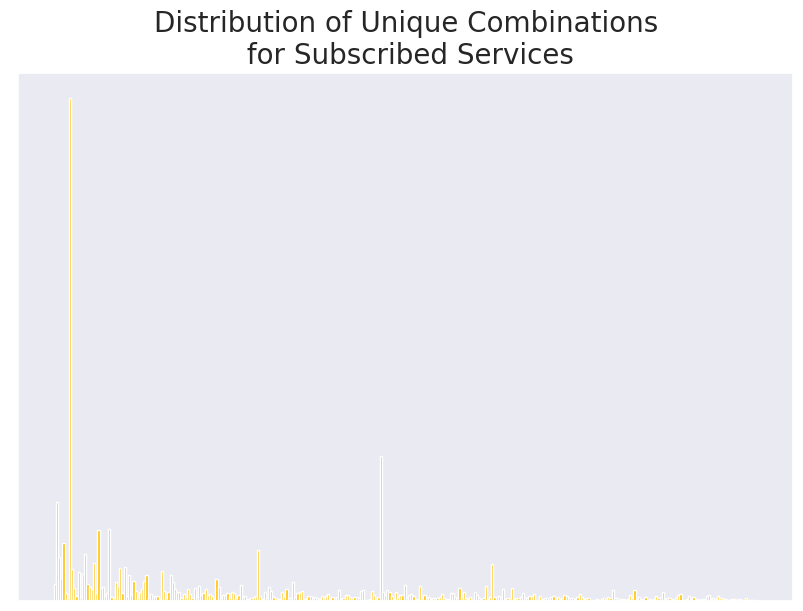

In [ ]:
df['sub_svc'] = df['Phone Service'].astype(str) + '|' + df['Multiple Lines'].astype(str) + '|' + df['Internet Service'] + '|' + df['Online Security'].astype(str) + '|' + \
df['Online Backup'].astype(str) + '|' + df['Device Protection'].astype(str) + '|' + df['Tech Support'].astype(str) + '|' + df['Streaming TV'].astype(str) + '|' + df['Streaming Movies'].astype(str)

print("No. of unique values: ",len(df['sub_svc'].unique()))

plt.figure(figsize=(10,7))
n,bins,patch = plt.hist(df['sub_svc'],color='#FFC100',bins=len(df['sub_svc'].unique()),histtype='bar',orientation="vertical")
plt.yticks(fontsize=20)
plt.tick_params(left = True, bottom = False)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
ax.set_title("Distribution of Unique Combinations\n for Subscribed Services",fontsize=20)
plt.show()

In [ ]:
# Mean Encoding of Internet/Phone Services into Subscribed Services
mean_encode = df.groupby(by=['sub_svc'])['Churn Value'].mean()
df.loc[:,'Sub Svc Enc'] = df['sub_svc'].map(mean_encode)
df.drop(columns=['sub_svc'],inplace=True)
df = df.drop(columns=['Multiple Lines','Phone Service','Internet Service','Online Security','Online Backup','Device Protection', 'Tech Support','Streaming TV','Streaming Movies'])
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,Churn Score,CLTV,Churn Reason,Sub Svc Enc
0,1,0,0,0,2,Month-to-month,1,Mailed check,53.85,1,86,3239,Competitor made better offer,0.205128
1,0,0,0,1,2,Month-to-month,1,Electronic check,70.70,1,67,2701,Moved,0.592275
2,0,0,0,1,8,Month-to-month,1,Electronic check,99.65,1,86,5372,Moved,0.557692
3,0,0,1,1,28,Month-to-month,1,Electronic check,104.80,1,84,5003,Moved,0.433962
4,1,0,0,1,49,Month-to-month,1,Bank transfer (automatic),103.70,1,89,5340,Competitor had better devices,0.448529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,Two year,1,Bank transfer (automatic),21.15,0,45,5306,Did not churn,0.086993
7039,1,0,1,1,24,One year,1,Mailed check,84.80,0,59,2140,Did not churn,0.066667
7040,0,0,1,1,72,One year,1,Credit card (automatic),103.20,0,71,5560,Did not churn,0.448529
7041,0,0,1,1,11,Month-to-month,1,Electronic check,29.60,0,59,2793,Did not churn,0.238095


In [ ]:
def mean_encoding(df,col_to_encode,target_var):
    final_var = col_to_encode + " Enc"
    mean_encode = df.groupby(by=[col_to_encode])[target_var].mean()
    df.loc[:,final_var] = df[col_to_encode].map(mean_encode)
    df.drop(columns=[col_to_encode],inplace=True)
    return

In [ ]:
mean_encode_cols = ['Contract','Payment Method']
# Remember to drop churn reason when running classifier models
# Only kept it to do subsequent analysis on why customers churned

for col in mean_encode_cols:
    mean_encoding(df,col,'Churn Value')

In [ ]:
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,Monthly Charges,Churn Value,Churn Score,CLTV,Churn Reason,Sub Svc Enc,Contract Enc,Payment Method Enc
0,1,0,0,0,2,1,53.85,1,86,3239,Competitor made better offer,0.205128,0.427097,0.191067
1,0,0,0,1,2,1,70.70,1,67,2701,Moved,0.592275,0.427097,0.452854
2,0,0,0,1,8,1,99.65,1,86,5372,Moved,0.557692,0.427097,0.452854
3,0,0,1,1,28,1,104.80,1,84,5003,Moved,0.433962,0.427097,0.452854
4,1,0,0,1,49,1,103.70,1,89,5340,Competitor had better devices,0.448529,0.427097,0.167098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,21.15,0,45,5306,Did not churn,0.086993,0.028319,0.167098
7039,1,0,1,1,24,1,84.80,0,59,2140,Did not churn,0.066667,0.112695,0.191067
7040,0,0,1,1,72,1,103.20,0,71,5560,Did not churn,0.448529,0.112695,0.152431
7041,0,0,1,1,11,1,29.60,0,59,2793,Did not churn,0.238095,0.427097,0.452854


In [ ]:
# create copy of df with churn reason included, for subsequent analysis if required
import copy
df_all = copy.deepcopy(df)

In [ ]:
# Move target variable to last column
other = df['Churn Value']
df.drop(columns=['Churn Value'],inplace=True)
df = df.join(other)

# Drop Churn Score & CLTV & Churn Reason
df.drop(columns=['Churn Score','CLTV','Churn Reason'],inplace=True)
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,Monthly Charges,Sub Svc Enc,Contract Enc,Payment Method Enc,Churn Value
0,1,0,0,0,2,1,53.85,0.205128,0.427097,0.191067,1
1,0,0,0,1,2,1,70.70,0.592275,0.427097,0.452854,1
2,0,0,0,1,8,1,99.65,0.557692,0.427097,0.452854,1
3,0,0,1,1,28,1,104.80,0.433962,0.427097,0.452854,1
4,1,0,0,1,49,1,103.70,0.448529,0.427097,0.167098,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,21.15,0.086993,0.028319,0.167098,0
7039,1,0,1,1,24,1,84.80,0.066667,0.112695,0.191067,0
7040,0,0,1,1,72,1,103.20,0.448529,0.112695,0.152431,0
7041,0,0,1,1,11,1,29.60,0.238095,0.427097,0.452854,0


In [ ]:
# Export to CSV and save in Github
df.to_csv('Telco_churn_cleaned.csv', index=False)
df_all.to_csv('Telco_churn_all_cleaned.csv', index=False)

## **Building of Classifier Model**


In [3]:
df_all = pd.read_csv('./Telco_churn_all_cleaned.csv')
df = pd.read_csv('./Telco_churn_cleaned.csv')

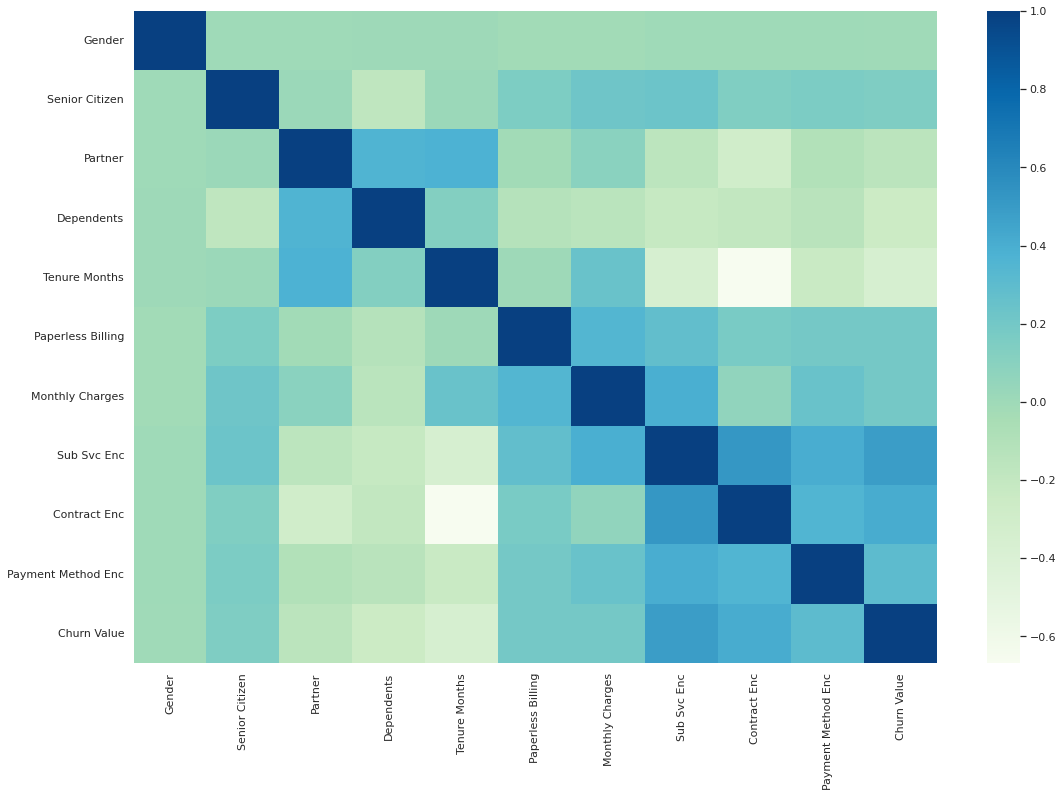

In [ ]:
# Checks for multicollinearity
sns.set(rc={'figure.figsize':(18,12)})
sns.heatmap(df.corr(method="pearson"),cmap='GnBu');

In [ ]:
# Multicollinearity Check
# Identifying pairs with correlation above 50%
# Pairs with correlation >= 70% will be considered correlated.
c = df.corr().abs()

s = c.unstack()
so = pd.DataFrame(s.sort_values(kind="quicksort",ascending=False))
so[(so[0] >= 0.5) & (so[0] != 1)]

,,0
Tenure Months,Contract Enc,0.668862
Contract Enc,Tenure Months,0.668862
Sub Svc Enc,Contract Enc,0.522352
Contract Enc,Sub Svc Enc,0.522352


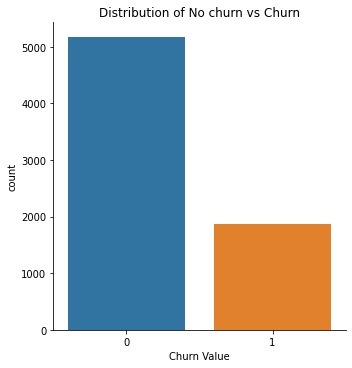

In [ ]:
# Illustration of imbalanced data
sns.catplot(x="Churn Value", kind="count", data=df)
plt.title('Distribution of No churn vs Churn')
plt.show()

In [ ]:
df

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,Monthly Charges,Sub Svc Enc,Contract Enc,Payment Method Enc,Churn Value
0,1,0,0,0,2,1,53.85,0.205128,0.427097,0.191067,1
1,0,0,0,1,2,1,70.70,0.592275,0.427097,0.452854,1
2,0,0,0,1,8,1,99.65,0.557692,0.427097,0.452854,1
3,0,0,1,1,28,1,104.80,0.433962,0.427097,0.452854,1
4,1,0,0,1,49,1,103.70,0.448529,0.427097,0.167098,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,21.15,0.086993,0.028319,0.167098,0
7039,1,0,1,1,24,1,84.80,0.066667,0.112695,0.191067,0
7040,0,0,1,1,72,1,103.20,0.448529,0.112695,0.152431,0
7041,0,0,1,1,11,1,29.60,0.238095,0.427097,0.452854,0


In [ ]:
# Prepare stratified train/test set to apply trained classifier model on

from sklearn.model_selection import StratifiedKFold
from sklearn import tree, ensemble, model_selection, metrics, linear_model

y = df.iloc[:, -1]
x = df.drop(columns=['Churn Value'])

skf = StratifiedKFold(n_splits=5, shuffle=True)
skf.get_n_splits(x, y)

x_train_, x_test = 0,0
y_train, y_test = 0,0

for train_index, test_index in skf.split(x,y):
    y_train, y_test = y[train_index], y[test_index]
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]

sample_num = df.shape[0]
print(sample_num)

feature_num = df.shape[1]-1
print(feature_num)

7043
10


In [ ]:
# Optimisation of RF hyperparameters using GridSearchCV
parameters = [
    {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5], 'min_samples_split': [5], 'max_features':[6,7,8]},
    {'criterion': ['gini', 'entropy'], 'max_depth': [3], 'min_samples_split': [3, 5, 7, 9], 'max_features':[6,7,8]}]

clf = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), parameters, \
                                   cv = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022), scoring='f1')
clf.fit(x, y)
print('best score:', clf.best_score_)
print('best parameters: ', clf.best_params_)

criterion = clf.best_params_.get('criterion')
max_depth = clf.best_params_.get('max_depth')
min_samples_split = clf.best_params_.get('min_samples_split')
max_features = clf.best_params_.get('max_features')

In [ ]:
# Random Forest: Applying optimal RF hyperparameters on identified train/test set
rforest = ensemble.RandomForestClassifier(criterion = criterion, n_estimators = 100, max_features = max_features, oob_score = True, \
                                          random_state = 2019, max_depth=max_depth, min_samples_split=min_samples_split)
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)

print('accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1:', metrics.f1_score(y_test, y_pred))

accuracy: 0.8117897727272727
f1: 0.6197991391678623


In [ ]:
# Random Forest: Feature Ranking using optimal hyperparameters
feature_names = x_train.columns
rforest = ensemble.RandomForestClassifier(criterion = criterion, n_estimators = 100, max_features = max_features, oob_score = True, \
                                          random_state = 2019, max_depth=max_depth, min_samples_split=min_samples_split)
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)

print('accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1:', metrics.f1_score(y_test, y_pred))

result = permutation_importance(
    rforest, x_test, y_test, n_repeats=10, random_state=42, n_jobs=2, scoring='f1')
forest_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=False)
forest_importances

accuracy: 0.8117897727272727
f1: 0.6197991391678623


Sub Svc Enc           0.227313
Contract Enc          0.107366
Tenure Months         0.099645
Dependents            0.046191
Monthly Charges       0.036066
Payment Method Enc    0.005264
Paperless Billing     0.001852
Partner               0.001560
Gender                0.001456
Senior Citizen        0.000178
dtype: float64

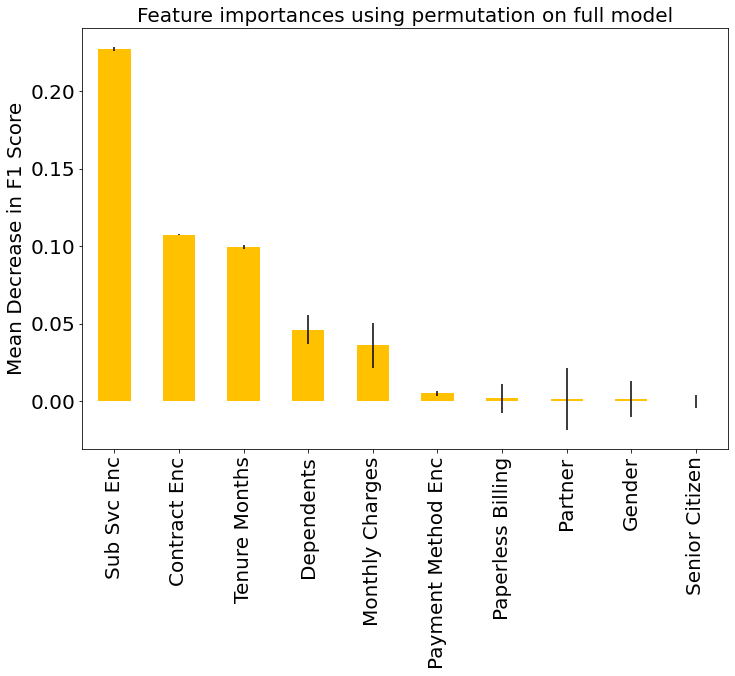

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, color = '#FFC100')
ax.set_title("Feature importances using permutation on full model",fontsize=20)
ax.set_ylabel("Mean Decrease in F1 Score", fontsize=20)
fig.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('', fontsize=20)
plt.show()

### **Classifiers (For Testing)**

**Logistic Regression**<br>
*On whole dataset*

In [ ]:
# Optimisation of Logistic Regression hyperparameters using GridSearchCV
parameters = [{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}]

clf = model_selection.GridSearchCV(linear_model.LogisticRegression(solver = 'lbfgs', max_iter=10000), parameters, cv = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2022), scoring='f1')
clf.fit(x, y)
print('best score:', clf.best_score_)
print('best parameters: ', clf.best_params_)
C = clf.best_params_.get('C')

best score: 0.6165109272071976
best parameters:  {'C': 10}


In [ ]:
# Build Logistic Regression using best C based on f1 score prioritisation
estimator = linear_model.LogisticRegression(solver = 'lbfgs', max_iter=10000, C = C)
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1:', metrics.f1_score(y_test, y_pred))

accuracy: 0.8146570089475926
f1: 0.6200873362445415


**Logistic Regression**<br>
<font color="teal">*On identified features*</font>

In [ ]:
df_i = df.drop(columns=['Senior Citizen'])
y_i = df_i.iloc[:, -1]
x_i = df_i.drop(columns=['Churn Value'])

for train_index, test_index in skf.split(x,y): # ok to use x, y since length is the same
    y_i_train, y_i_test = y_i[train_index], y_i[test_index]
    x_i_train, x_i_test = x_i.iloc[train_index], x_i.iloc[test_index]

In [ ]:
# Optimisation of Logistic Regression hyperparameters using GridSearchCV
parameters = [{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}]

clf = model_selection.GridSearchCV(linear_model.LogisticRegression(solver = 'lbfgs', max_iter=10000), parameters, cv = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2022), scoring='f1')
clf.fit(x_i, y_i)
print('best score:', clf.best_score_)
print('best parameters: ', clf.best_params_)
C = clf.best_params_.get('C')

best score: 0.6151889873884262
best parameters:  {'C': 10}


In [ ]:
# Build Logistic Regression using best C based on f1 score prioritisation
estimator = linear_model.LogisticRegression(solver = 'lbfgs', max_iter=10000, C = C)
estimator.fit(x_i_train, y_i_train)
y_i_pred = estimator.predict(x_i_test)
print('accuracy:', metrics.accuracy_score(y_i_test, y_i_pred))
print('f1:', metrics.f1_score(y_i_test, y_i_pred))

accuracy: 0.8121005538985939
f1: 0.6208082545141875


**MultinomialNB**

In [ ]:
# Optimisation of MultinomialNB hyperparameters using GridSearchCV
parameters = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}]

clf = model_selection.GridSearchCV(naive_bayes.MultinomialNB(), parameters, cv = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2022), scoring='f1')
clf.fit(x, y)
print('best score:', clf.best_score_)
print('best parameters: ', clf.best_params_)
alpha = clf.best_params_.get('alpha')

best score: 0.5826749270315562
best parameters:  {'alpha': 10}


In [ ]:
# Build MultinomialNB using best alpha based on f1 score prioritisation
clf = naive_bayes.MultinomialNB(alpha=alpha)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1:', metrics.f1_score(y_test, y_pred))

accuracy: 0.708138048572646
f1: 0.5774213448488588


**SVM**

In [ ]:
from sklearn import svm
# Optimisation of SVM hyperparameters using GridSearchCV
parameters = [{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}]

clf = model_selection.GridSearchCV(svm.SVC(), parameters, cv = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2022), scoring='f1')
clf.fit(x, y)
print('best score:', clf.best_score_)
print('best parameters: ', clf.best_params_)
alpha = clf.best_params_.get('alpha')

best score: 0.5448829428555675
best parameters:  {'C': 100}


In [ ]:
# Build SVM using best C based on f1 score prioritisation
clf = svm.SVC(C=C)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))
print('f1:', metrics.f1_score(y_test, y_pred))

accuracy: 0.7818491691521091
f1: 0.4699792960662526


## **Descriptive Analysis of Features Identified to be Important**

In [ ]:
#Load original dataset
df = pd.read_csv('https://raw.githubusercontent.com/MITB-WH/DS-for-BIS/main/Telco_churn.csv?token=GHSAT0AAAAAABSGYDLEA26G6F62NYBTUBR4YR6RQVQ')

**Subscribed Services**

In [ ]:
con = pd.crosstab(df_add['sub_svc'], 
                            df_add['Churn Value'],
                                margins = True)
con = con.sort_values(by=['All'],ascending=False)
con = con.drop(index=('All'))
with pd.option_context('display.max_rows', None, 'display.max_columns', con.shape[1]):
    print(con)

Churn Value                     0    1   All
sub_svc                                     
1|0|No|0|0|0|0|0|0           1081  103  1184
1|1|DSL|0|1|0|0|1|1           535    0   535
1|1|DSL|0|1|0|0|1|0           535    0   535
1|0|Fiber optic|1|1|1|0|0|1   535    0   535
1|0|Fiber optic|1|1|1|0|1|0   535    0   535
0|0|DSL|1|1|1|1|1|1           535    0   535
0|0|DSL|1|1|1|1|1|0           535    0   535
0|0|DSL|1|1|1|1|0|1           535    0   535
1|0|Fiber optic|1|1|1|1|0|0   535    0   535
1|0|Fiber optic|1|1|1|1|1|0   535    0   535
0|0|DSL|1|1|1|0|1|0           535    0   535
0|0|DSL|1|1|1|0|0|1           535    0   535
1|0|Fiber optic|1|1|0|1|0|1   535    0   535
0|0|DSL|1|1|0|1|1|1           535    0   535
1|1|DSL|0|0|1|0|1|0           535    0   535
0|0|DSL|1|1|0|1|0|1           535    0   535
0|0|DSL|1|1|0|1|0|0           535    0   535
1|1|DSL|0|0|1|1|0|1           535    0   535
0|0|DSL|1|1|0|0|1|0           535    0   535
1|0|DSL|1|0|0|0|1|0           535    0   535
1|0|Fiber 

In [ ]:
df['Phone / Internet'] = np.where((df['Internet Service'] == 'No') & (df['Phone Service'] == 'Yes'),"Phone only",
                                  np.where((df['Internet Service'] != 'No') & (df['Phone Service'] == 'No'),"Internet only","Phone and Internet"))

con = pd.crosstab(df['Phone / Internet'], df['Churn Value'], normalize='index')
con

Churn Value,0,1
Phone / Internet,,
Internet only,0.750733,0.249267
Phone and Internet,0.671975,0.328025
Phone only,0.925950,0.074050


In [ ]:
# Run chisq
chi2, p, dof, expected = stats.chi2_contingency(con)
print("Chi-sq Test")
print("Chi2 test stat:",chi2)
print("P value:",p)
print("Degrees of freedom:",dof)

Chi-sq Test
Chi2 test stat: 364.51979899428943
P value: 2.9203003727695145e-81
Degrees of freedom: 1


In [ ]:
# Since degree of freedom is > 1, we need to run post-hoc Bonferroni COrrection which counteracts the increased risk of a Type I error that accompanies multiple pairwise comparison.
import itertools
print("After applying Bonferroni Correction, the difference between the following pair(s) are deemed to be statistically significant:\n")
all_combi = list(itertools.combinations(con.index,2))
for comb in all_combi:
    new_con = con[(con.index == comb[0]) | (con.index == comb[1])]
    if (new_con[1] == 0).all() == True or (new_con[0] == 0).all() == True:
    None
    else:
        chi2,p,dof,expected = stats.chi2_contingency(new_con)
        if p <= 0.05:
            print(comb)
            print("Chi2 test stat:",chi2)
            print("P value:",p,'\n')


After applying Bonferroni Correction, the difference between the following pair(s) are deemed to be statistically significant:



In [ ]:
# Filter to only customers who have internet service
internet = df[df['Phone / Internet'] != 'Phone only']

In [ ]:
internet = internet[['Online Security','Online Backup','Device Protection','Tech Support','Churn Value','Monthly Charges']]
for col in ['Online Security','Online Backup','Device Protection','Tech Support']:
    recoding_service(internet,col)
internet

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Online Security,Online Backup,Device Protection,Tech Support,Churn Value,Monthly Charges
0,1,1,0,0,1,53.85
1,0,0,0,0,1,70.70
2,0,0,1,0,1,99.65
3,0,0,1,1,1,104.80
4,0,1,1,0,1,103.70
...,...,...,...,...,...,...
7037,0,1,1,1,0,60.65
7039,1,0,1,1,0,84.80
7040,0,1,1,0,0,103.20
7041,1,0,0,0,0,29.60


In [ ]:
# Create new feature to track no. of Internet Services Subscribed
internet['No. of Int Sub Svc'] = internet['Online Security'] + internet['Online Backup'] + internet['Device Protection'] + internet['Tech Support']

In [ ]:
con = pd.crosstab(internet['No. of Int Sub Svc'], internet['Churn Value'],normalize='index')
con

Churn Value,0,1
No. of Int Sub Svc,,
0,0.433307,0.566693
1,0.611452,0.388548
2,0.762391,0.237609
3,0.875664,0.124336
4,0.946809,0.053191


**Tenure Months**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


(0.0, 0.025)

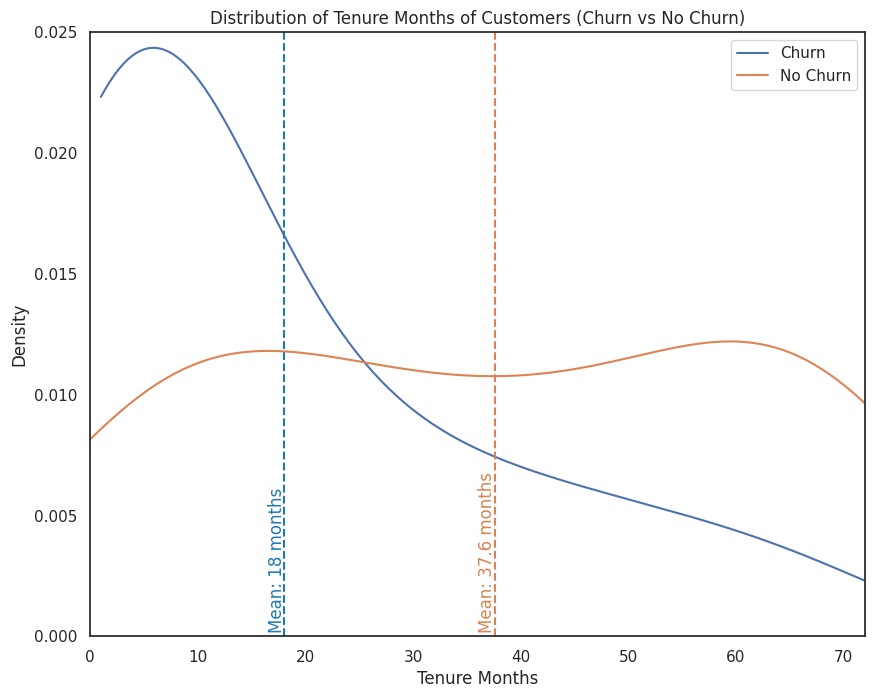

In [ ]:
fig, ax = plt.subplots()
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.set_style("white")
sns.kdeplot(data=df[df['Churn Value']==1], x="Tenure Months",bw=0.5,cut=0)
sns.kdeplot(data=df[df['Churn Value']==0], x="Tenure Months",bw=0.5,cut=0)
plt.legend(labels=["Churn","No Churn"])
plt.axvline(x=18,color='#1f77b4',linestyle='--')
ax.text(16.5, 0.0003, 'Mean: 18 months', rotation=90, fontsize=12,color='#1f77b4')
plt.axvline(x=37.6,color='#DC8250',linestyle='--')
ax.text(36, 0.0003, 'Mean: 37.6 months', rotation=90, fontsize=12,color='#DC8250')
plt.title("Distribution of Tenure Months of Customers (Churn vs No Churn)")
ax.set_xlim([0,72])
ax.set_ylim([0,0.025])

In [ ]:
print("Churn:",df[df['Churn Value']==1]['Tenure Months'].mean())
print("No Churn:",df[df['Churn Value']==0]['Tenure Months'].mean())

Churn: 17.979133226324237
No Churn: 37.56996521066873


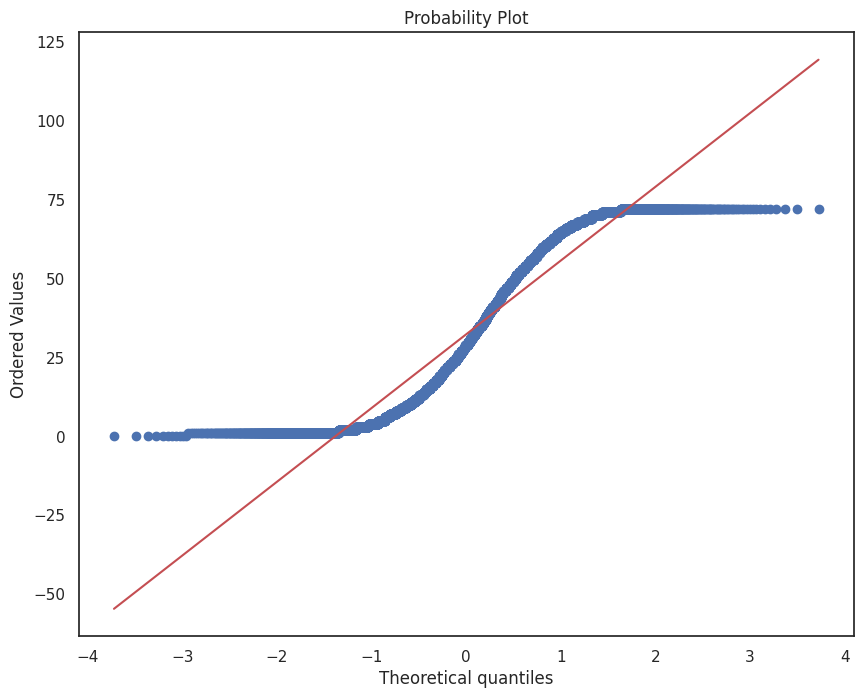

In [ ]:
# Check assumptions for ANOVA
# Normality checks
# QQ Plot
import pylab
stats.probplot(df['Tenure Months'],dist='norm',plot=pylab)
pylab.show()

In [ ]:
# Since not normally distributed, use non-parametric ANOVA (Kruskal wallis)
kruskal = stats.kruskal(df[df['Churn Value']==1]['Monthly Charges'],df[df['Churn Value']==0]['Monthly Charges'])
kruskal.pvalue

3.3112855487838454e-54

**Monthly Charges**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


(0.0, 0.017)

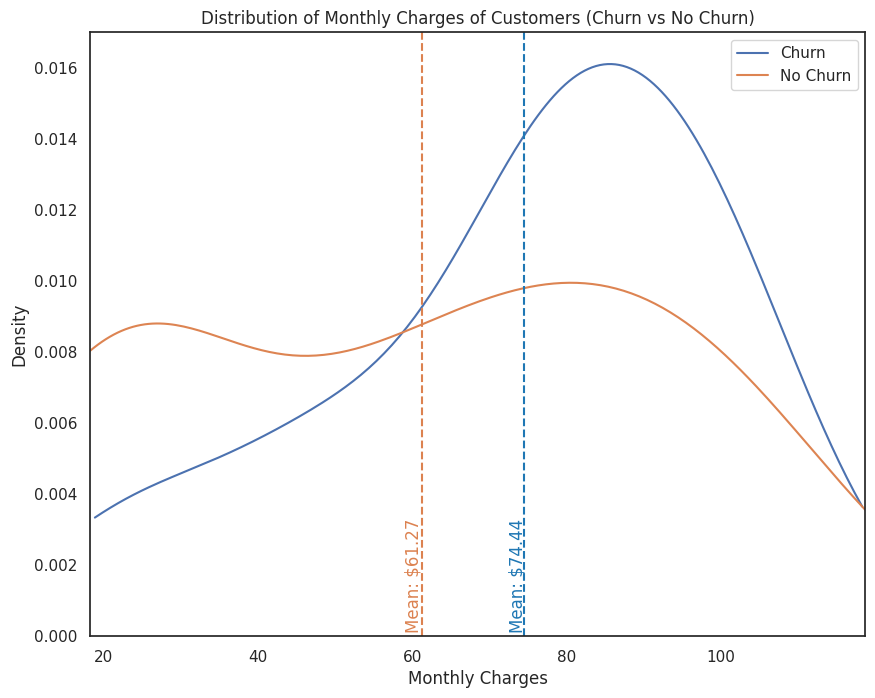

In [ ]:
fig, ax = plt.subplots()
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
sns.set_style("white")
sns.kdeplot(data=df[df['Churn Value']==1], x="Monthly Charges",bw=0.5,cut=0)
sns.kdeplot(data=df[df['Churn Value']==0], x="Monthly Charges",bw=0.5,cut=0)
plt.legend(labels=["Churn","No Churn"])
plt.axvline(x=74.4413322632423,color='#1f77b4',linestyle='--')
ax.text(72.5, 0.0002, 'Mean: $74.44', rotation=90, fontsize=12,color='#1f77b4')
plt.axvline(x=61.2651236953999,color='#DC8250',linestyle='--')
ax.text(59, 0.0002, 'Mean: $61.27', rotation=90, fontsize=12,color='#DC8250')
plt.title("Distribution of Monthly Charges of Customers (Churn vs No Churn)")
ax.set_xlim([18.25,118.75])
ax.set_ylim([0,0.017])

In [ ]:
print("Churn:",df[df['Churn Value']==1]['Monthly Charges'].mean())
print("No Churn:",df[df['Churn Value']==0]['Monthly Charges'].mean())

Churn: 74.4413322632423
No Churn: 61.2651236953999


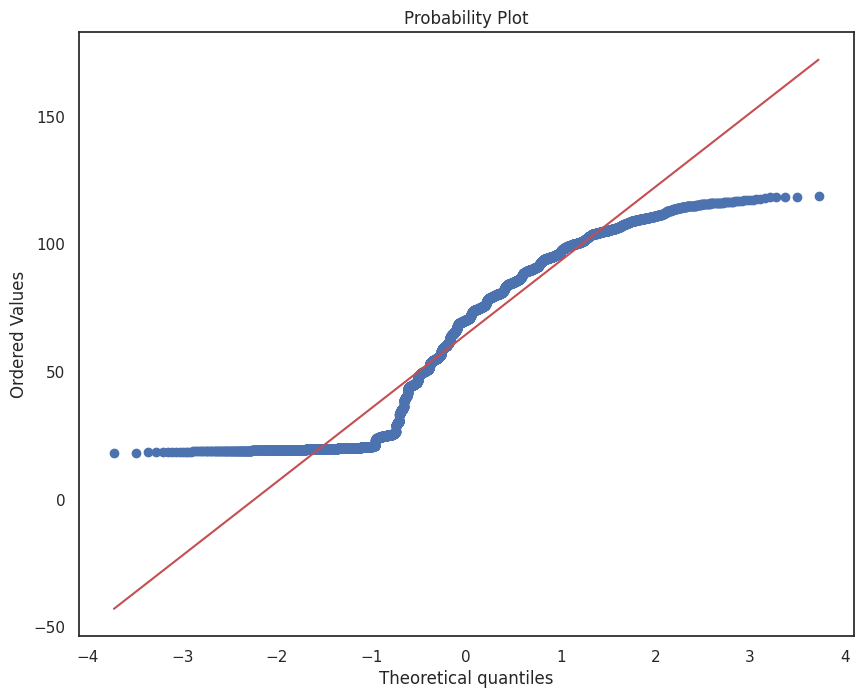

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [ ]:
# Check assumptions for ANOVA
# Normality checks
# QQ Plot
import pylab
stats.probplot(df['Monthly Charges'],dist='norm',plot=pylab)
pylab.show()

In [ ]:
# Since not normally distributed, use non-parametric ANOVA (Kruskal wallis)
kruskal = stats.kruskal(df[df['Churn Value']==1]['Monthly Charges'],df[df['Churn Value']==0]['Monthly Charges'])
kruskal.pvalue

3.3112855487838454e-54

In [ ]:
# Use ANOVA to check if difference in means is statistically significant
import scipy.stats as stats

fvalue, pvalue = stats.f_oneway(df[df['Churn Value']==1]['Monthly Charges'], df[df['Churn Value']==0]['Monthly Charges'])
print("One-way ANOVA")
print("F value:",fvalue)
print("P value:",pvalue)

One-way ANOVA
F value: 273.4637042077133
P value: 2.7066456068950115e-60


**Payment Method**

In [ ]:
con = pd.crosstab(df['Payment Method'], df['Churn Value'])
con

Churn Value,0,1
Payment Method,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [ ]:
# Run chisq
chi2, p, dof, expected = stats.chi2_contingency(con)
print("Chi-sq Test")
print("Chi2 test stat:",chi2)
print("P value:",p)
print("Degrees of freedom:",dof)

Chi-sq Test
Chi2 test stat: 648.1423274814
P value: 3.6823546520097993e-140
Degrees of freedom: 3


In [ ]:
# Since degree of freedom is > 1, we need to run post-hoc Bonferroni COrrection which counteracts the increased risk of a Type I error that accompanies multiple pairwise comparison.
import itertools
print("After applying Bonferroni Correction, the difference between the following pair(s) are deemed to be statistically significant:\n")
all_combi = list(itertools.combinations(con.index,2))
for comb in all_combi:
    new_con = con[(con.index == comb[0]) | (con.index == comb[1])]
    if (new_con[1] == 0).all() == True or (new_con[0] == 0).all() == True:
    None
    else:
        chi2,p,dof,expected = stats.chi2_contingency(new_con)
        if p <= 0.05:
            print(comb)
            print("Chi2 test stat:",chi2)
            print("P value:",p,'\n')


After applying Bonferroni Correction, the difference between the following pair(s) are deemed to be statistically significant:

('Bank transfer (automatic)', 'Electronic check')
Chi2 test stat: 338.65748126915776
P value: 1.2509759791691312e-75 

('Credit card (automatic)', 'Electronic check')
Chi2 test stat: 373.70389620692004
P value: 2.922481649208432e-83 

('Credit card (automatic)', 'Mailed check')
Chi2 test stat: 7.925384746879857
P value: 0.004874597817431084 

('Electronic check', 'Mailed check')
Chi2 test stat: 288.87676162876903
P value: 8.735774179052085e-65 



In [ ]:
# Create new feature to bin payment methods into automated and manual
df['Payment Method Type'] = np.where((df['Payment Method'] == 'Bank transfer (automatic)') | (df['Payment Method'] == 'Credit card (automatic)'),"Automated","Manual")

In [ ]:
con = pd.crosstab(df['Payment Method Type'], df['Churn Value'])
con

Churn Value,0,1
Payment Method Type,,
Automated,2576,490
Manual,2598,1379


In [ ]:
# Run chisq
chi2, p, dof, expected = stats.chi2_contingency(con)
print("Chi-sq Test")
print("Chi2 test stat:",chi2)
print("P value:",p)
print("Degrees of freedom:",dof)

Chi-sq Test
Chi2 test stat: 309.3485572016954
P value: 3.0278725722860343e-69
Degrees of freedom: 1


**Contract Types**

In [ ]:
con = pd.crosstab(df['Contract'], df['Churn Value'],normalize='index')
con

Churn Value,0,1
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [ ]:
# Run chisq
chi2, p, dof, expected = stats.chi2_contingency(con)
print("Chi-sq Test")
print("Chi2 test stat:",chi2)
print("P value:",p)
print("Degrees of freedom:",dof)

Chi-sq Test
Chi2 test stat: 1184.5965720837926
P value: 5.863038300673391e-258
Degrees of freedom: 2


In [ ]:
# Since degree of freedom is > 1, we need to run post-hoc Bonferroni COrrection which counteracts the increased risk of a Type I error that accompanies multiple pairwise comparison.
import itertools
print("After applying Bonferroni Correction, the difference between the following pair(s) are deemed to be statistically significant:\n")
all_combi = list(itertools.combinations(con.index,2))
for comb in all_combi:
    new_con = con[(con.index == comb[0]) | (con.index == comb[1])]
    if (new_con[1] == 0).all() == True or (new_con[0] == 0).all() == True:
    None
    else:
        chi2,p,dof,expected = stats.chi2_contingency(new_con)
        if p <= 0.05:
            print(comb)
            print("Chi2 test stat:",chi2)
            print("P value:",p,'\n')


After applying Bonferroni Correction, the difference between the following pair(s) are deemed to be statistically significant:

('Month-to-month', 'One year')
Chi2 test stat: 468.4084443130493
P value: 7.113840265103799e-104 

('Month-to-month', 'Two year')
Chi2 test stat: 881.5491392476928
P value: 1.0066121957758375e-193 

('One year', 'Two year')
Chi2 test stat: 87.74487319747102
P value: 7.446569154214134e-21 

